In [1]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [2]:
rob1 = Image.open(r'C:\Users\Eduardo\Downloads\PortableGit\TCC_faces\Primera\Input\chris_evans.jpg')
# rob2 = Image.open('robert2.jpg')
# chris = Image.open('chris.jpg')

(-0.5, 2999.5, 1999.5, -0.5)

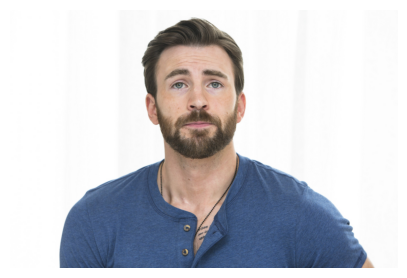

In [3]:
plt.figure(figsize=(5, 4))
plt.imshow(rob1)
plt.axis('off')

In [4]:
import torch
from facenet_pytorch import MTCNN
import numpy as np

# Detectar si se dispone de GPU cuda
# ==============================================================================
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))
mtcnn = MTCNN(
            select_largest = True,
            min_face_size  = 20,
            thresholds     = [0.6, 0.7, 0.7],
            post_process   = False,
            image_size     = 160,
            device         = device
        )

Running on device: cpu


In [5]:
boxes, probs, landmarks = mtcnn.detect(rob1, landmarks=True)
print('Bounding boxes:', boxes)
print('Probability:', probs)
print('landmarks:', landmarks)

Bounding boxes: [[1129.7742919921875 252.32730102539062 1741.076171875 1099.9886474609375]]
Probability: [0.9999991655349731]
landmarks: [[[1309.4434814453125 580.6468505859375]
  [1579.928466796875 582.9302978515625]
  [1456.5089111328125 726.3244018554688]
  [1339.9840087890625 898.5232543945312]
  [1563.4249267578125 899.5712890625]]]


(-0.5, 2999.5, 1999.5, -0.5)

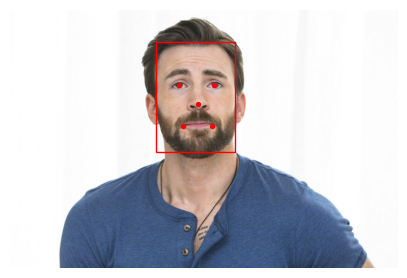

In [6]:
box = boxes[0]
landmark = landmarks[0]
fig, ax  = plt.subplots(figsize=(5, 4))
ax.imshow(rob1)
ax.scatter(landmark[:, 0], landmark[:, 1], s=8, c= 'red')
rect = plt.Rectangle(
            xy     = (box[0], box[1]),
            width  = box[2] - box[0],
            height = box[3] - box[1],
            fill   = False,
            color  = 'red'
       )
ax.add_patch(rect)
ax.axis('off')

In [12]:
imagen_2 =Image.open(r'C:\Users\Eduardo\Downloads\PortableGit\TCC_faces\Primera\Input\malitos.jpg')

(-0.5, 690.5, 481.5, -0.5)

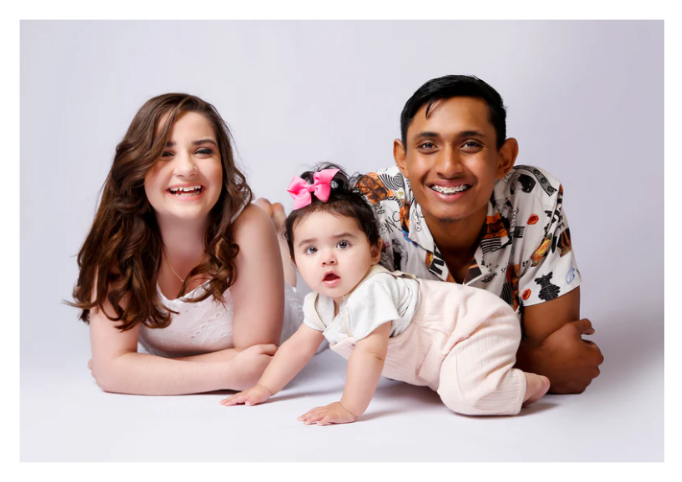

In [13]:
plt.figure(figsize=(10, 6))
plt.imshow(imagen_2)
plt.axis('off')

In [16]:
boxes, probs, landmarks = mtcnn.detect(imagen_2, landmarks=True)

# Representación con matplotlib
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 7))
ax.imshow(imagen_2)

for box, landmark in zip(boxes, landmarks):
    ax.scatter(landmark[:, 0], landmark[:, 1], s=8, c= 'red')
    rect = plt.Rectangle(
                xy     = (box[0], box[1]),
                width  = box[2] - box[0],
                height = box[3] - box[1],
                fill   = False,
                color  = 'red'
           )
    ax.add_patch(rect)
    
ax.axis('off')

RuntimeError: Given groups=1, weight of size [10, 3, 3, 3], expected input[1, 4, 290, 415] to have 3 channels, but got 4 channels instead

(-0.5, 159.5, 159.5, -0.5)

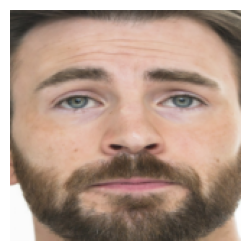

In [15]:
# Detección de cara
# ==============================================================================
face = mtcnn.forward(rob1)
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
face = face.permute(1, 2, 0).int().numpy()
ax.imshow(face)
plt.axis('off')

In [17]:
mtcnn = MTCNN(
            keep_all      = True,
            min_face_size = 20,
            thresholds    = [0.6, 0.7, 0.7],
            post_process  = False,
            image_size    = 160,
            device        = device
        )
faces = mtcnn.forward(rob1)

In [18]:
round(faces.shape[0] /5)

0

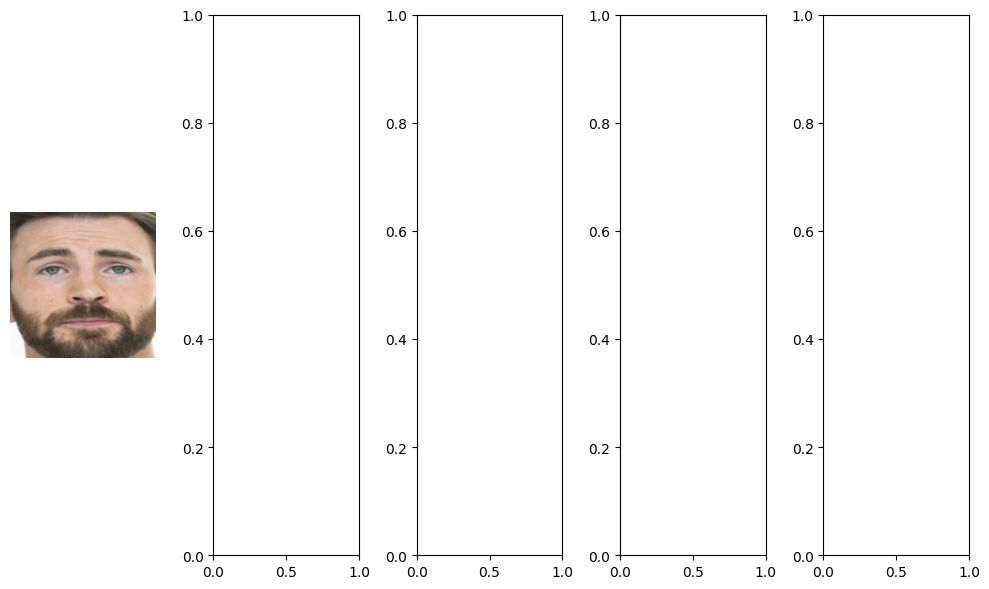

In [19]:
import math
n_caras = faces.shape[0] 

fig, axs = plt.subplots(nrows=math.ceil(n_caras/5), ncols=5, figsize=(10, 6))
axs= axs.flatten()

for i in range(faces.shape[0]):
    face = faces[i,:,:,:].permute(1, 2, 0).int().numpy()
    axs[i].imshow(face)
    axs[i].axis('off')
    
plt.tight_layout()

In [20]:
from facenet_pytorch import InceptionResnetV1
encoder = InceptionResnetV1(pretrained='vggface2', classify=False, device=device).eval()

100.0%


In [21]:
cara = mtcnn(rob1)
embedding_cara = encoder.forward(cara.reshape((1,3, 160, 160))).detach().cpu()
embedding_cara

tensor([[ 5.2405e-02, -1.1297e-02,  4.0628e-02,  2.4955e-02,  5.8659e-02,
         -3.8170e-02, -9.8439e-03, -1.0828e-02, -1.4012e-02, -3.4131e-02,
         -9.2492e-02, -2.5907e-02, -9.4292e-02, -7.8999e-03,  7.5376e-02,
         -5.7803e-02, -8.3500e-03, -1.8756e-02,  3.2937e-02,  3.2487e-02,
          8.1809e-03,  4.0045e-02, -3.9658e-02,  6.8557e-03,  2.1184e-02,
          5.0403e-03,  1.1110e-01, -1.0731e-02,  2.7576e-02, -9.3796e-02,
         -4.4838e-03,  5.1043e-02,  2.2929e-02,  2.4290e-02,  5.5818e-02,
          8.4334e-03, -6.8422e-02,  4.6044e-02, -3.0742e-02,  3.2603e-02,
          1.5104e-03,  9.4969e-03, -4.5955e-03, -1.1406e-01, -1.5881e-02,
         -5.9545e-02,  2.9360e-02, -9.3856e-03, -4.7530e-02,  2.5767e-02,
          1.0510e-01,  6.8089e-02,  5.4803e-02,  5.7957e-02, -5.1131e-03,
         -3.8748e-02,  3.8810e-02,  7.3710e-02,  1.1158e-02,  2.0447e-02,
         -1.8227e-02, -9.2308e-02,  9.0321e-02, -4.6972e-02,  2.0637e-02,
          3.0355e-02,  3.3065e-02, -6.

In [22]:
mtcnn = MTCNN(
            keep_all      = True,
            min_face_size = 20,
            thresholds    = [0.6, 0.7, 0.7],
            post_process  = False,
            image_size    = 160,
            device        = device
        )